# DSSATTools Tutorial

In this tutorial the DSSAT ITHY8001 Sorghum experiment will be reproduced using DSSATTools. DSSATTools serves as a wraper to the CSM. The idea is to run DSSAT simulations in a programmatic way in a similar way as it would be done using the DSSAT GUI and the data creation tools.

If you are familiar to DSSAT, then this tutorial will only present a different way to do what you already know how to do using the GUI. If you are not familiar to DSSAT, then I recommend you to go over the [DSSAT Tutorials in youtube](https://www.youtube.com/@DSSATFoundation).

The first step is importing the needed classes and modules:

In [4]:
# Install the library in case it is not installed
%pip install DSSATTools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [5]:
from DSSATTools import (
    crop, # module that contains the classes for the different crops.
    WeatherStation, # class needed to define the Weather. 
    SoilProfile, SoilLayer, # classes that define the entire soil profile, and the soil layers within the soil profile
    filex, # module that contains the clases for the FileX sections.
    DSSAT # the simulation environment class.
)
import pandas as pd
from datetime import datetime
import tempfile
import os

/home/diego/DSSATTools_notebooks/venv/lib/python3.10/site-packages/DSSATTools/__init__.py:105: DeprecationWarning: DSSATTools version 3.0.0 is a major upgrade and will not be backwards compatible with previous versions. If you are running code that was developed  using a previous DSSATTools version, then install DSSATTools version 2.1.6
  warnings.warn(


**Weather**

In this case, we will create the weather station using data from a DataFrame. The DataFrame will be created from DSSAT Weather files:

In [6]:
# Create DataFrame from DSSAT Weather files
df = []
for year in range(80, 82):
    df.append(pd.read_csv(
        f'https://github.com/DSSAT/dssat-csm-data/blob/develop/Weather/ITHY{year}01.WTH?raw=true',
        skiprows=3, sep="\s+"
    ))
df = pd.concat(df, ignore_index=True)
df.columns = ['date', 'srad', 'tmax', 'tmin', 'rain']
df["date"] = pd.to_datetime(df.date, format='%y%j')
df.head()

<>:6: DeprecationWarning: invalid escape sequence '\s'
<>:6: DeprecationWarning: invalid escape sequence '\s'
/tmp/ipykernel_360636/267037138.py:6: DeprecationWarning: invalid escape sequence '\s'
  skiprows=3, sep="\s+"


,date,srad,tmax,tmin,rain
0,1980-01-01,18.8,28.8,14.6,0.0
1,1980-01-02,16.9,29.3,14.6,0.0
2,1980-01-03,13.6,29.4,16.0,0.0
3,1980-01-04,18.3,28.4,16.6,0.0
4,1980-01-05,18.7,28.7,18.3,0.0


In [7]:
# Create weather station using the DataFrame
weather_station = WeatherStation(
    insi='ITHY', lat=17.530, long=78.270, elev=0, tav=25.8, 
    amp=11.8, refht=2.0, wndht=3.0, table=df
)
weather_station

WeatherStation(insi='ITHY', lat=17.53, long=78.27, elev=0.0, tav=25.8, amp=11.8, refht=2.0, wndht=3.0, cco2=nan, table=
   DATE  SRAD  TMAX  TMIN  RAIN  DEWP  WIND   PAR  EVAP  RHUM 
1980001  18.8  28.8  14.6   0.0   -99   -99   -99   -99   -99
1980002  16.9  29.3  14.6   0.0   -99   -99   -99   -99   -99
1980003  13.6  29.4  16.0   0.0   -99   -99   -99   -99   -99
1980004  18.3  28.4  16.6   0.0   -99   -99   -99   -99   -99
1980005  18.7  28.7  18.3   0.0   -99   -99   -99   -99   -99
1980006  17.0  28.7  18.2   0.0   -99   -99   -99   -99   -99
...
...)

**Soil**

The soil profile can be created by entering all the soil surface properties, and all the layers' propeties:

In [8]:
soil = SoilProfile(
        # First all the surface properties are defined
        name='IBMZ910214', soil_series_name='Millhopper Fine Sand', 
        site='Gainesville', country='USA', lat=29.6, long=-82.37, 
        soil_data_source='Gainesville', soil_clasification='S',
        scs_family='Loamy,silic,hyperth Arnic Paleudult', scom='', salb=0.18, 
        slu1=2.0, sldr=0.65, slro=60.0, slnf=1.0, slpf=0.92, smhb='IB001',
        smpx='IB001', smke='IB001',
        # Then, the layers' properties are defined layer by layer
        table = [
            SoilLayer(
                slb=5.0, slmh='', slll=0.026, sdul=0.096, ssat=0.345, srgf=1.0, 
                ssks=7.4, sbdm=1.66, sloc=0.67, slcl=1.7, slsi=0.9, slcf=0.0, 
                slhw=7.0, scec=20.0
            ),
            SoilLayer(
                slb=15.0, slmh='', slll=0.025, sdul=0.105, ssat=0.345, srgf=1.0, 
                ssks=7.4, sbdm=1.66, sloc=0.67, slcl=1.7, slsi=0.9, slcf=0.0, 
                slhw=7.0
            ),
            SoilLayer(
                slb=30.0, slmh='', slll=0.075, sdul=0.12, ssat=0.345, srgf=0.7, 
                ssks=14.8, sbdm=1.66, sloc=0.17, slcl=2.4, slsi=2.6, slcf=0.0, 
                slhw=7.0
            ),
            SoilLayer(
                slb=45.0, slmh='', slll=0.025, sdul=0.086, ssat=0.345, srgf=0.3, 
                ssks=3.7, sbdm=1.66, sloc=0.17, slcl=2.4, slsi=2.6, slcf=0.0, 
                slhw=7.0
            ),
            SoilLayer(
                slb=60.0, slmh='', slll=0.025, sdul=0.072, ssat=0.345, srgf=0.3, 
                ssks=3.7, sbdm=1.66, sloc=0.17, slcl=2.4, slsi=2.6, slcf=0.0, 
                slhw=7.0
            ),
            SoilLayer(
                slb=90.0, slmh='', slll=0.028, sdul=0.072, ssat=0.345, srgf=0.1, 
                ssks=3.7, sbdm=1.66, sloc=0.17, slcl=2.4, slsi=2.6, slcf=0.0, 
                slhw=7.0
            ),
            SoilLayer(
                slb=120.0, slmh='', slll=0.028, sdul=0.08, ssat=0.345, srgf=0.1, 
                ssks=0.1, sbdm=1.66, sloc=0.18, slcl=7.7, slsi=3.1, slcf=0.0, 
                slhw=7.0,
            ),
            SoilLayer(
                slb=150.0, slmh='', slll=0.029, sdul=0.09, ssat=0.345, srgf=0.05, 
                ssks=0.1, sbdm=1.66, sloc=0.15, slcl=7.7, slsi=3.1, slcf=0.0, 
                slhw=7.0
            ),
            SoilLayer(
                slb=180.0, slmh='', slll=0.029, sdul=0.09, ssat=0.345, srgf=0.05, 
                ssks=0.1, sbdm=1.66, sloc=0.1, slcl=7.7, slsi=3.1, slcf=0.0, 
                slhw=7.0
            )
        ]
    )
soil

SoilProfile(name='IBMZ910214', soil_data_source='Gainesville', soil_clasification='S', soil_depth=180.0, soil_series_name='Millhopper Fine Sand', site='Gainesville', country='USA', lat=29.6, long=-82.37, scs_family='Loamy,silic,hyperth Arnic Paleudult', scom='', salb=0.18, slu1=2.0, sldr=0.65, slro=60.0, slnf=1.0, slpf=0.92, smhb='IB001', smpx='IB001', smke='IB001', table=
  SLB SLMH   SLLL  SDUL  SSAT  SRGF  SSKS  SBDM  SLOC  SLCL  SLSI  SLCF  SLNI  SLHW  SLHB  SCEC  SADC  SLPX  SLPT  SLPO CACO3  SLAL  SLFE  SLMN  SLBS  SLPA  SLPB  SLKE  SLMG  SLNA  SLSU  SLEC  SLCA 
    5 -99   0.026 0.096 0.345 1.000  7.40  1.66  0.67   1.7   0.9   0.0   -99   7.0   -99  20.0   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99
   15 -99   0.025 0.105 0.345 1.000  7.40  1.66  0.67   1.7   0.9   0.0   -99   7.0   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99
   30 -99   0.075 0.120 0.345

We can also create the soil layer by loading a soil layer from a DSSAT soil file:

In [9]:
# Download and save the DSSAT Soil file 
import urllib.request
response = urllib.request.urlopen('https://github.com/DSSAT/dssat-csm-data/blob/develop/Soil/SOIL.SOL?raw=true')
soil_file_str = ''.join([l.decode('utf-8') for l in response])
with open('SOIL.SOL', 'w') as f:
    f.write(soil_file_str)

In [10]:
# Create the soil profile from file
soil = SoilProfile.from_file('IBSG910085', 'SOIL.SOL')

**Cultivar**

The cultivar definition is straightforward. For that you just call one of the crop classes passing the cultivar code as argument. The cultivar must be included in the DSSAT default cultivar files.

In [11]:
# Define the sorghum cultivar
cultivar = crop.Sorghum('IB0026')
cultivar

CropPars(var-name='CSH-1', expno='.', eco#=CropPars(econame='GENERIC', tbase=8.0, topt=34.0, ropt=34.0, gdde=6.0, rue=3.2, kcan=0.85, stpc=0.1, rtpc=0.25, tilfc=0.0, plam=6000.0), p1=410.0, p2=102.0, p2o=13.6, p2r=40.0, panth=617.5, p3=152.5, p4=81.5, p5=640.0, phint=49.0, g1=0.031, g2=5.982, pbase=nan, psat=nan)

**FileX (Management and Options)**

Now that the cultivar, soil and weather are defined, we only have to define the experimental options. Note that when we define the cultivar using Python in this notebook it is equivalent to create the .CUL and .ECO DSSAT files. The case is the same with the weather station and soil profile. Having a a WeatherStation instance created is like having a .WTH file or files created using the GUI. Having the SoilLayer instance created is like having a .SOL file created using the DSSAT GUI.

Now, there is not a single class to represent the DSSAT FileX. Instead, there are classes to represent each of the sections of the DSSAT FileX, e.g. Planting, Fertilizer, Residue, Field, etc. All the sections have their own class, excepting Environmental Modifications, and the treatments section. Then, the equivalent of the DSSAT FileX is the collection of sections of FileX.

We will create the sections defined in that experiment. This experiment have two treatments, the first treatment (Control) does not include Fertilizer application:

In [12]:
# Define Field. Note that the weather station and soil profile that we created before
# are one of the parameters to define the field
field = filex.Field(
    id_field='ITHY0001', wsta=weather_station, flob=0, fldt='DR000', 
    fldd=0, flds=0, id_soil=soil
)
# Initial conditions is defined similar to the soil profile, including a table that 
# represents the soil profile.
initial_conditions = filex.InitialConditions(
    pcr='SG', icdat=datetime(1980, 7, 3), icrt=500, icnd=0,
    icrn=1, icre=1, icres=1300, icren=.5, icrep=0, icrip=100, icrid=10,
    table=pd.DataFrame([
        (10, .06, 2.5, 1.8),
        (22, .06, 2.5, 1.8),
        (52, .195, 3., 4.5),
        (82, .21, 3.5, 5.0),
        (112, 0.2, 2., 2.0),
        (142, 0.2, 1., 0.7),
        (172, 0.2, 1., 0.6),
    ], columns=['icbl', 'sh2o', 'snh4', 'sno3'])
)
# Define planting
planting = filex.Planting(
    pdate=datetime(1980, 6, 17), ppop=18, ppoe=18, plme='S',
    plds='R', plrs=45, plrd=0, pldp=5
)
# Define the simulation controls. The simulation controls section is split in subsections.
# Each sub-section of the simulation controls section has its own class
simulation_controls = filex.SimulationControls(
    general=filex.SCGeneral(sdate=datetime(1980, 6, 17)),
    options=filex.SCOptions(water='Y', nitro='Y', symbi='N'),
    methods=filex.SCMethods(infil='S'),
    management=filex.SCManagement(irrig='N', ferti='R', resid='N', harvs='M')
)

**Run a single treatment**

Now we have what we need to run the model. The model run is managed by the DSSAT class. That class can be seen as a "simulation environment". Consider it to be a folder where all the simulation files (input and output) will be in. This folder can be an existing folder, or a new folder that will be created. If a folder is not specified, then it will create a random temporary folder.

In [13]:
# Create the simulation environment
TMP = tempfile.tempdir 
dssat = DSSAT(os.path.join(TMP, 'dssat_test'))
# Run the model
results = dssat.run_treatment(
    field=field, cultivar=cultivar, planting=planting, 
    initial_conditions=initial_conditions, simulation_controls=simulation_controls
)

/tmp/dssat_test created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 SG   1  67 109 12614  5356   592     0   351    93   110    29  13375   95


**Check outputs**

You see that the model run outputs the CSM standard output, which is an end-of-season summary. That summary is stored in the `results` variable in this case. 

Now, the time-series tabular output is saved in the `output_tables` attribute: 

In [14]:
# Save the PlantGro table for the control treatment
results_plantgro = {'Control': dssat.output_tables['PlantGro']}
results_plantgro['Control'].head()

,@YEAR,DOY,DAS,DAP,L#SD,GSTD,LAID,LWAD,SWAD,GWAD,...,RL6D,RL7D,RL8D,RL9D,CDAD,LDAD,SDAD,SNW0C,SNW1C,DTTD
1980-06-17,1980,169,1,0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,17.86
1980-06-18,1980,170,2,1,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,20.77
1980-06-19,1980,171,3,2,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,21.88
1980-06-20,1980,172,4,3,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,22.73
1980-06-21,1980,173,5,4,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,22.54


The `output_files` contains all the output files in string format. So you can for example check the Overview file:

In [15]:
print(dssat.output_files['OVERVIEW'])

*SIMULATION OVERVIEW FILE

*DSSAT Cropping System Model Ver. 4.8.2.000 -HEAD  APR 13, 2025 13:26:28

*RUN   1        : DSSATTools                SGCER048 ITHY8001    1
 MODEL          : SGCER048 - Sorghum
 EXPERIMENT     : ITHY8001 SG
 DATA PATH      :
 TREATMENT  1   : DSSATTools                SGCER048


 CROP           : Sorghum          CULTIVAR : CSH-1            ECOTYPE :IB0001
 STARTING DATE  : JUN 17 1980
 PLANTING DATE  : JUN 17 1980      PLANTS/m2 :    18.0    ROW SPACING :  45.cm
 WEATHER        : ITHY   1980
 SOIL           : IBSG910085     TEXTURE : -99   - Patencheru
 SOIL INIT COND : DEPTH:172cm EXTR. H2O:150.8mm  NO3: 69.1kg/ha  NH4: 60.3kg/ha
 WATER BALANCE  : RAINFED
 IRRIGATION     : NOT IRRIGATED
 NITROGEN BAL.  : SOIL-N & N-UPTAKE SIMULATION; NO N-FIXATION
 N-FERTILIZER   :        0 kg/ha IN     0 APPLICATIONS
 RESIDUE/MANURE : INITIAL :  1300 kg/ha ;       0 kg/ha IN     0 APPLICATIONS
 ENVIRONM. OPT. : DAYL=    0.00  SRAD=    0.00  TMAX=    0.00  TMIN=    0.00
  

**Run another treatment**

Now, the second treatment includes a single 80 kg Urea-N fertilizer application. We can run that second treatment in the same way that we run the control treatment using the same simulation environment, but this time including the Fertilizer section:

In [16]:
fertilizer = filex.Fertilizer(table=[
    filex.FertilizerEvent(
        fdate=datetime(1980, 7, 3), fmcd='FE005', fdep=5,
        famn=80, facd='AP002'
    )
])
results = dssat.run_treatment(
    field=field, cultivar=cultivar, planting=planting, 
    initial_conditions=initial_conditions, fertilizer=fertilizer,
    simulation_controls=simulation_controls
)


RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 SG   1  67 109 13917  6404   592     0   350    92   155    56  13378   95


In [17]:
# Save the results for this treatment
results_plantgro['80 kg Urea-N'] = dssat.output_tables['PlantGro']

**Compare treatments**

Now we can compare the Grain Weight for the two treatments. You'll see that the results are identical to those obtained using the DSSAT GUI.

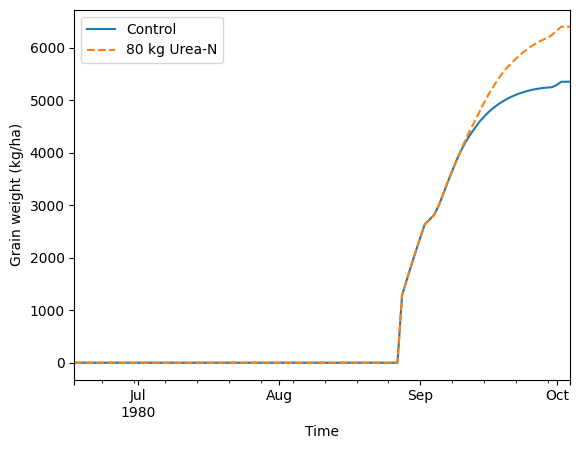

In [18]:
ax = results_plantgro['Control'].GWAD.plot(label='Control')
results_plantgro['80 kg Urea-N'].GWAD.plot(ax=ax, label='80 kg Urea-N', linestyle='--')
ax.set_xlabel('Time')
ax.set_ylabel('Grain weight (kg/ha)')
ax.legend()

This is the end of this tutorial.